In [100]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [101]:
#Loading the data 
df=pd.read_csv("/content/airline-passenger-traffic.csv", header=None)
df.head(5)

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [102]:
# organizing the Data
df.columns=["Month","Passengers"]
df["Month"]=pd.to_datetime(df["Month"],format="%Y-%m")
df=df.set_index("Month")
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


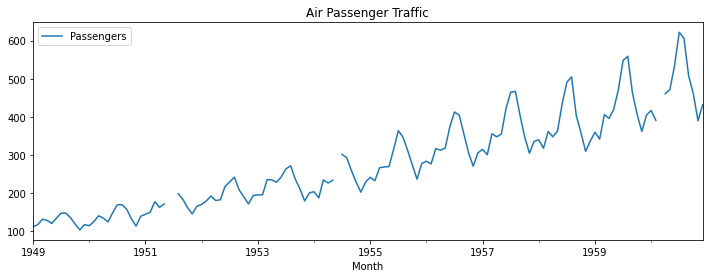

In [103]:
# Plotting time series Data
df.plot(figsize=(12,4))
plt.legend(loc="best")
plt.title("Air Passenger Traffic")
plt.show(block=False)

## Treating missing values

## Mean Imputation

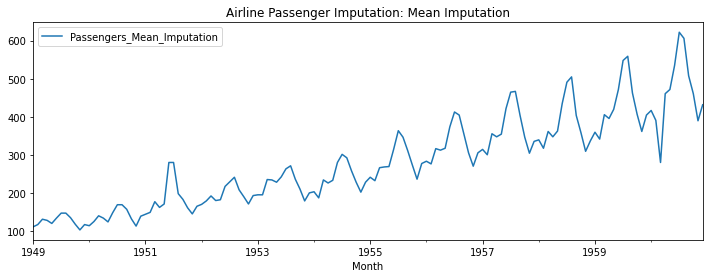

In [104]:
df=df.assign(Passengers_Mean_Imputation=df.Passengers.fillna(df.Passengers.mean()))
df[["Passengers_Mean_Imputation"]].plot(figsize=(12,4))
plt.legend(loc="best")
plt.title("Airline Passenger Imputation: Mean Imputation")
plt.show(block=False)

## Linear Interpolation




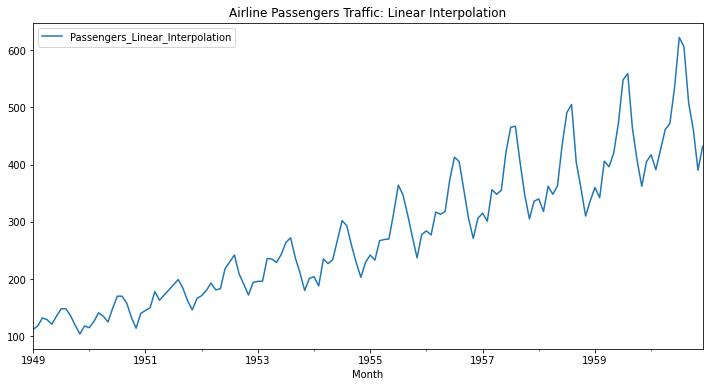

In [105]:
df= df.assign(Passengers_Linear_Interpolation= df.Passengers.interpolate(method="linear"))
df["Passengers_Linear_Interpolation"].plot(figsize=(12,6))
plt.legend(loc="best")
plt.title("Airline Passengers Traffic: Linear Interpolation")
plt.show(block=False)

In [106]:
df["Passengers"]= df["Passengers_Linear_Interpolation"]
df.drop(columns=["Passengers_Mean_Imputation","Passengers_Linear_Interpolation"],inplace=True)

## Outlier detection

## Box Plot and Interquartile Range





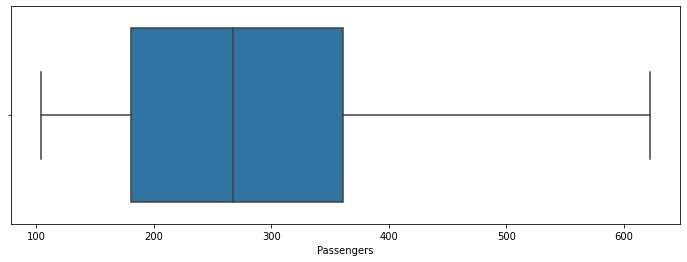

In [107]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 4))
ax= sns.boxplot(x=df["Passengers"],whis=1.5)

## Histogram

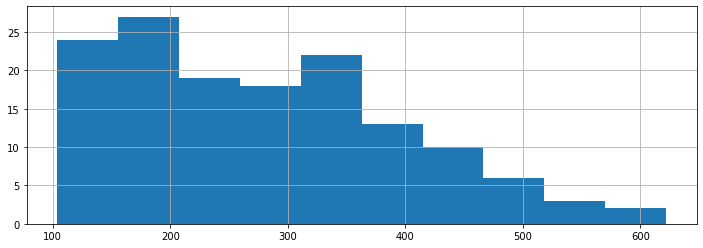

In [108]:
fig= df["Passengers"].hist(figsize=(12,4))

## Time series Decomposition


### Using Additive seasonal decomposition

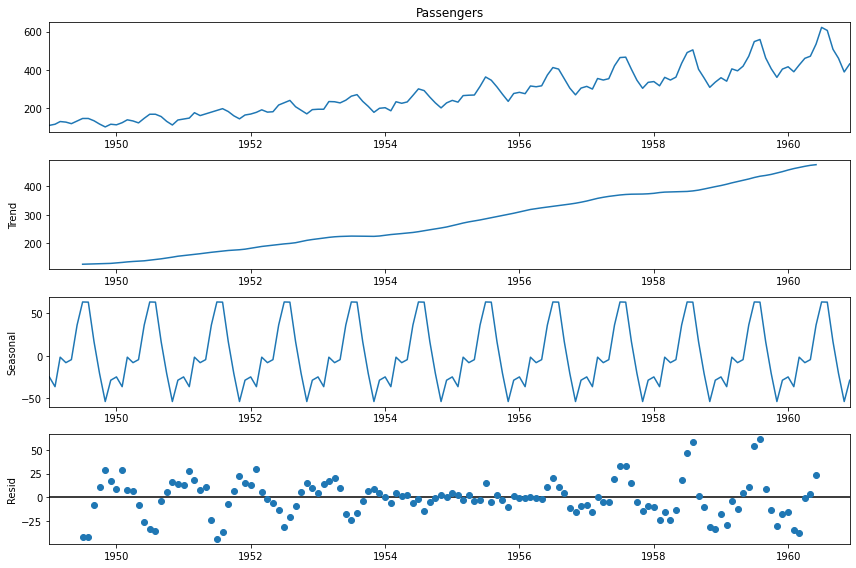

In [109]:
from pylab import rcParams
import statsmodels.api as sm
rcParams["figure.figsize"]=12,8
decomposition= sm.tsa.seasonal_decompose(df.Passengers, model="additive")
fig= decomposition.plot()
plt.show()

### Multiplicative decomposition

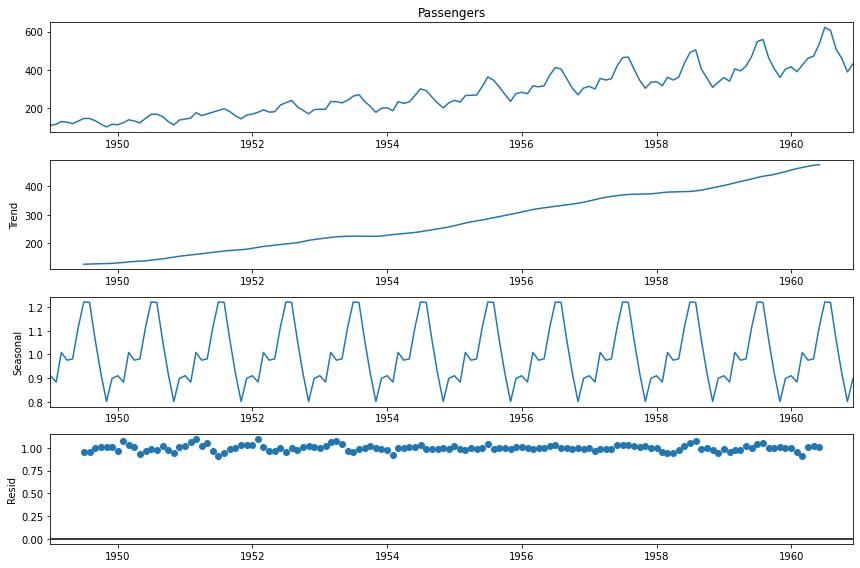

In [110]:
decomposition = sm.tsa.seasonal_decompose(df.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

## Building and evaluation of time series data

### Train Test Split

In [111]:
train_len= 120
train= df[0:train_len]
test= df[train_len:]

### Trying simple time series methods

### Naive method

In [112]:
y_hat_naive=test.copy()
y_hat_naive["naive_forecast"]=train["Passengers"][train_len-1]

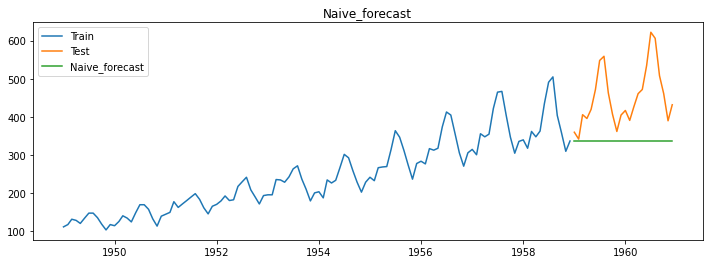

In [113]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label="Train")
plt.plot(test["Passengers"], label="Test")
plt.plot(y_hat_naive["naive_forecast"], label= "Naive_forecast")
plt.legend(loc="best")
plt.title("Naive_forecast")
plt.show(block= False)

### RMSC AND MAPE CALCULATION

In [114]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test["Passengers"],y_hat_naive["naive_forecast"])).round(2)
mape= np.round(np.mean(np.abs(test["Passengers"]-y_hat_naive["naive_forecast"])/test["Passengers"])*100,2)

results= pd.DataFrame({"METHOD":["NAIVE_METHOD"],"RMSE":[rmse],"MAPE":[mape]})
results= results[["METHOD","RMSE","MAPE"]]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63


### Simple Average Method

In [115]:
y_hat_avg=test.copy()
y_hat_avg["simple_avg_method"]=train["Passengers"].mean()

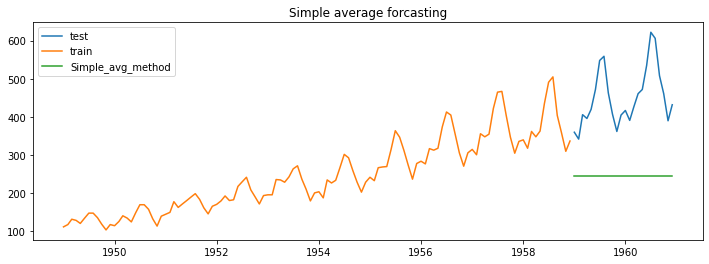

In [116]:
plt.figure(figsize=(12,4))
plt.plot(test["Passengers"],label="test")
plt.plot(train["Passengers"],label="train")
plt.plot(y_hat_avg["simple_avg_method"],label= "Simple_avg_method")
plt.legend(loc="best")
plt.title("Simple average forcasting")
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test["Passengers"],y_hat_avg["simple_avg_method"])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"]-y_hat_avg["simple_avg_method"])/test["Passengers"])*100,2)
sma_result=pd.DataFrame({"METHOD":["SA"], "RMSE":[rmse], "MAPE":[mape]})
results=pd.concat([results,sma_result])
results= results[["METHOD","RMSE","MAPE"]]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28


### Simple Moving Avg Method

In [118]:
y_hat_sma=df.copy()
ma_window= 12
y_hat_sma["sma_forecast"]= y_hat_sma["Passengers"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:]=y_hat_sma["sma_forecast"][train_len-1]
y_hat_sma.tail()

,Passengers,sma_forecast
Month,,
1960-08-01,606.0,381.0
1960-09-01,508.0,381.0
1960-10-01,461.0,381.0
1960-11-01,390.0,381.0
1960-12-01,432.0,381.0


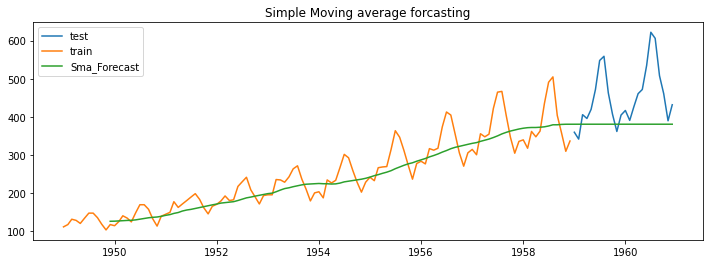

In [119]:
plt.figure(figsize=(12,4))
plt.plot(test["Passengers"],label="test")
plt.plot(train["Passengers"], label="train")
plt.plot( y_hat_sma["sma_forecast"], label= "Sma_Forecast")
plt.legend(loc="best")
plt.title('Simple Moving average forcasting')
plt.show(block=False)

### Calculating RMSE and MAPE

In [120]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

smaResults = pd.DataFrame({'METHOD':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, smaResults])
results = results[['METHOD', 'RMSE', 'MAPE']]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54


### Exponential smoothing methods

### Simple exponential smoothing

In [121]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model= SimpleExpSmoothing(train["Passengers"])
model_fit= model.fit(smoothing_level=0.2, optimized= False)
model_fit.params
y_hat_ses= test.copy()
y_hat_ses["Simple_Exp_Smoothing_Forecast"]=model_fit.forecast(24)

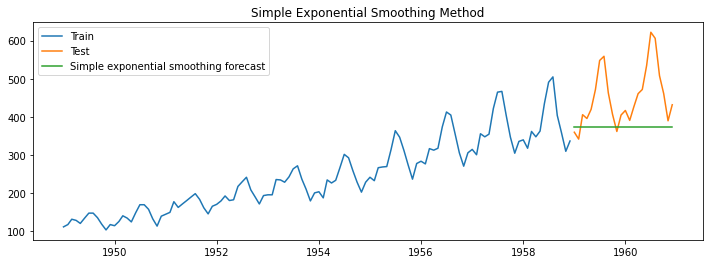

In [122]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['Simple_Exp_Smoothing_Forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [123]:
rmse= np.sqrt(mean_squared_error(test["Passengers"],y_hat_ses["Simple_Exp_Smoothing_Forecast"])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"]-y_hat_ses["Simple_Exp_Smoothing_Forecast"])/test["Passengers"])*100,2)
ses_results=pd.DataFrame({"METHOD":["SES"], "RMSE":[rmse], "MAPE":[mape]})
results= pd.concat([ results, ses_results])
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49


### Using Holt's method with Trend

In [124]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(np.asarray(train["Passengers"]),seasonal_periods=12, trend="additive", seasonal=None)
model_fit=model.fit(smoothing_level=0.2,smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt=test.copy()
y_hat_holt["ExpSmoothing"]= model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 112.0, 'initial_trend': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


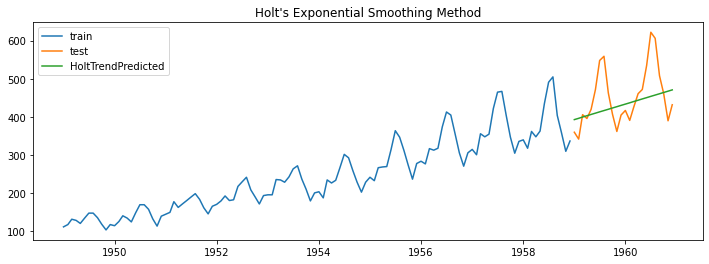

In [125]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label="train")
plt.plot(test["Passengers"], label="test")
plt.plot(y_hat_holt["ExpSmoothing"], label= "HoltTrendPredicted")
plt.title('Holt\'s Exponential Smoothing Method')
plt.legend(loc="best")
plt.show()

In [126]:
rmse=np.sqrt(mean_squared_error(test["Passengers"],y_hat_holt["ExpSmoothing"])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"] - y_hat_holt["ExpSmoothing"])/test["Passengers"])*100,2)
HoltTrendResults=pd.DataFrame({"METHOD":["HoltsTrend"], "RMSE":[rmse], "MAPE": [mape]})
results=pd.concat([results,HoltTrendResults])
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11


### Using Holt Winters' additive method with trend and seasonality



In [127]:
model= ExponentialSmoothing(np.asarray(train["Passengers"]), seasonal_periods=12, trend="add", seasonal="add")
model_fit= model.fit( optimized=True)
y_hat_hwa= test.copy()
y_hat_hwa["HoltWinterAdd"]=model_fit.forecast(24)
print(model_fit.params)

{'smoothing_level': 0.23609100105030162, 'smoothing_trend': 4.035260536814121e-07, 'smoothing_seasonal': 0.7639035285925002, 'damping_trend': nan, 'initial_level': 205.04957120982425, 'initial_trend': 2.2765498828493165, 'initial_seasons': array([ -95.322504  ,  -89.8001361 ,  -77.27797284,  -82.35494402,
        -91.05397295,  -76.91933104,  -64.65195941,  -66.55638906,
        -80.6280847 ,  -99.46152989, -114.15119392,  -98.02387778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


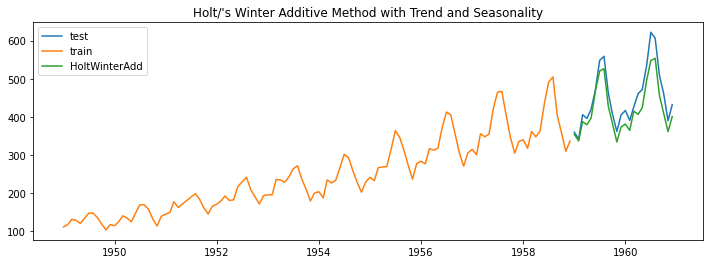

In [128]:
plt.figure(figsize=(12,4))
plt.plot(test["Passengers"], label="test")
plt.plot(train["Passengers"], label= "train")
plt.plot(y_hat_hwa["HoltWinterAdd"], label= "HoltWinterAdd")
plt.legend(loc="best")
plt.title("Holt/'s Winter Additive Method with Trend and Seasonality")
plt.show()

In [129]:
rmse=np.sqrt(mean_squared_error(test["Passengers"], y_hat_hwa["HoltWinterAdd"])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"] - y_hat_hwa["HoltWinterAdd"])/test["Passengers"])*100,2)
HWA_Results=pd.DataFrame({"METHOD":["Holt'/s winter additive method"], "RMSE": [rmse], "MAPE": [mape]})
results= pd.concat([results, HWA_Results])
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72


### Using Holt's Winter Multiplicative method using Trend and Seasonality

In [130]:
model= ExponentialSmoothing(np.asarray(train["Passengers"]), seasonal_periods=12, trend= "add", seasonal= "mul")
model_fit= model.fit(optimized= True)
y_hat_hwm=test.copy()
y_hat_hwm["HoltWinterMul"]= model_fit.forecast(24)
print(model_fit.params)

{'smoothing_level': 0.36558958245897727, 'smoothing_trend': 7.14415404696121e-07, 'smoothing_seasonal': 0.6344102255008066, 'damping_trend': nan, 'initial_level': 183.84785976162178, 'initial_trend': 3.9812085233418046, 'initial_seasons': array([0.59629431, 0.62721768, 0.68943108, 0.65540956, 0.6049442 ,
       0.66154701, 0.71939792, 0.71454549, 0.65179096, 0.56798811,
       0.50496819, 0.58257327]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


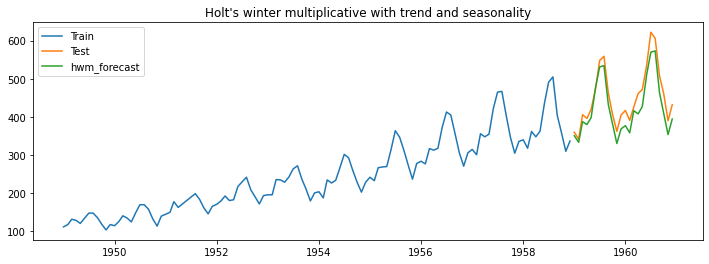

In [131]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label= "Train")
plt.plot(test["Passengers"], label= "Test")
plt.plot(y_hat_hwm["HoltWinterMul"], label= "hwm_forecast")
plt.title("Holt's winter multiplicative with trend and seasonality")
plt.legend(loc="best")
plt.show()

In [132]:
rmse= np.sqrt(mean_squared_error(test["Passengers"], y_hat_hwm["HoltWinterMul"])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"] - y_hat_hwm["HoltWinterMul"])/test["Passengers"])*100,2)
hwm_results= pd.DataFrame({"METHOD": ["hwm"], "RMSE": [rmse], "MAPE": [mape]})
results= pd.concat([results, hwm_results])
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45


### Auto Regressive Methods

## Stationary Tests

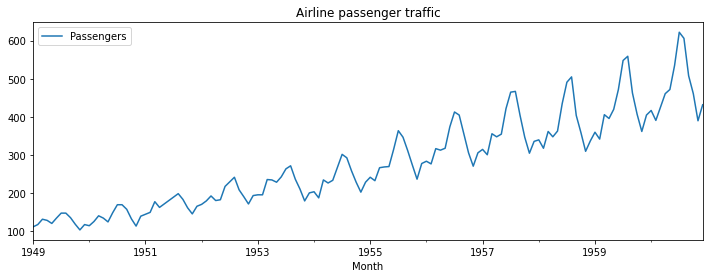

In [133]:
df['Passengers'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

### Augmented Dickey Fuller(ADF) test

In [134]:
from statsmodels.tsa.stattools import adfuller
adfuller_test=adfuller(df["Passengers"])
print("ADF Statistic: %f "%adfuller_test[0])
print("Crtical values @ 0.05: %.2f" %adfuller_test[4]["5%"])
print("pvalue: %f"% adfuller_test[1])

ADF Statistic: 0.894609 
Crtical values @ 0.05: -2.88
pvalue: 0.993020


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [135]:
from statsmodels.tsa.stattools import kpss
kpss_test= kpss(df["Passengers"])
print("Kpss_statistic:%f" % kpss_test[0])
print("Critical values at 0.05: %.2f" % kpss_test[3]["5%"])
print("P-Value: %f" % kpss_test[1])

Kpss_statistic:1.052050
Critical values at 0.05: 0.46
P-Value: 0.010000


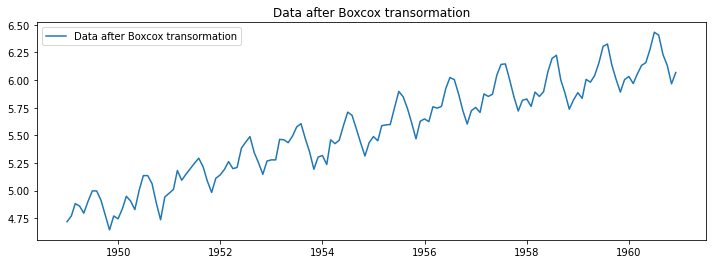

In [136]:
from scipy.stats import boxcox
df_boxcox= pd.Series(boxcox(df["Passengers"],lmbda=0),index=df.index)

plt.figure(figsize=(12,4))
plt.plot(df_boxcox, label= "Data after Boxcox transormation")
plt.legend(loc="best")
plt.title("Data after Boxcox transormation")
plt.show()

### Differencing to remove trend

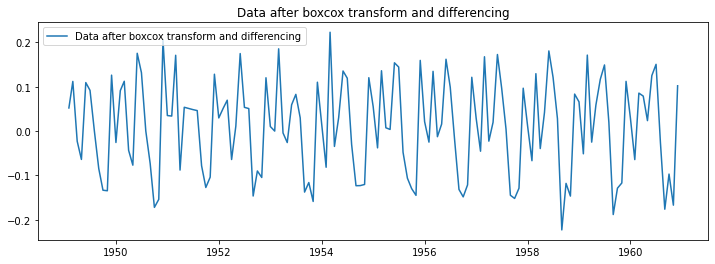

In [137]:
df_boxcox_dif= pd.Series(df_boxcox-df_boxcox.shift(), df.index)

plt.figure(figsize=(12,4))
plt.plot(df_boxcox_dif, label= "Data after boxcox transform and differencing")
plt.legend(loc="upper left")
plt.title("Data after boxcox transform and differencing")
plt.show()

In [138]:
df_boxcox_dif.dropna(inplace=True)

In [139]:
df_boxcox_dif.head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
dtype: float64

ADF Test to check stationarity

In [140]:
adf_test= adfuller(df_boxcox_dif)
print("Adf_Statistic: %f" %adf_test[0])
print("Critical Value: %f" %adf_test[4]["5%"])
print("p-value: %f"% adf_test[1])

Adf_Statistic: -3.290114
Critical Value: -2.884042
p-value: 0.015326


Kwiatkowsky phillips schmidt shin (kpss) test

In [141]:
kpss_test= kpss(df_boxcox_dif)
print("kpss Statistic: %f" %kpss_test[0])
print("Critical Value: %f" %kpss_test[3]["5%"])
print("p-value: %f"% kpss_test[1])

kpss Statistic: 0.101871
Critical Value: 0.463000
p-value: 0.100000


### Autocorrelation Function(ACF)

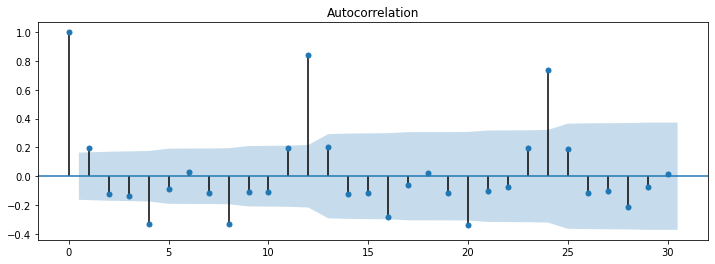

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_dif,ax=plt.gca(), lags= 30)
plt.show()

### Partial Auto correlation function

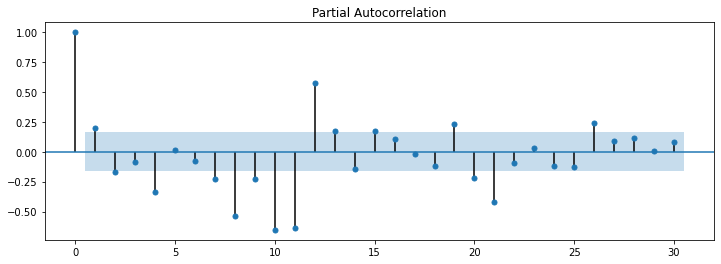

In [143]:
plt.figure(figsize=(12,4))
plot_pacf(df_boxcox_dif, ax=plt.gca(), lags=30)
plt.show()

In [144]:
train_data_boxcox= df_boxcox[:train_len]
test_data_boxcox= df_boxcox[train_len:]
train_data_boxcox_dif= df_boxcox_dif[:train_len-1]
test_data_boxcox_dif= df_boxcox_dif[train_len-1:]

In [145]:
train_data_boxcox_dif

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-08-01    0.028114
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
Length: 119, dtype: float64

### Auto Regression(AR) Method

In [146]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data_boxcox_dif, order=(1,0,0))
model_fit= model.fit()
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


### Recovering original time series

In [147]:
y_hat_ar= df_boxcox_dif.copy()
y_hat_ar["ar_forecast_boxcox_dif"]= model_fit.predict(df_boxcox_dif.index.min(),df_boxcox_dif.index.max())
y_hat_ar["ar_forecast_boxcox"]= y_hat_ar["ar_forecast_boxcox_dif"].cumsum()
y_hat_ar["ar_forecast_boxcox"]= y_hat_ar["ar_forecast_boxcox"].add(df_boxcox[0])
y_hat_ar["ar_forecast"]=np.exp(y_hat_ar["ar_forecast_boxcox"])

### Plotting forecast

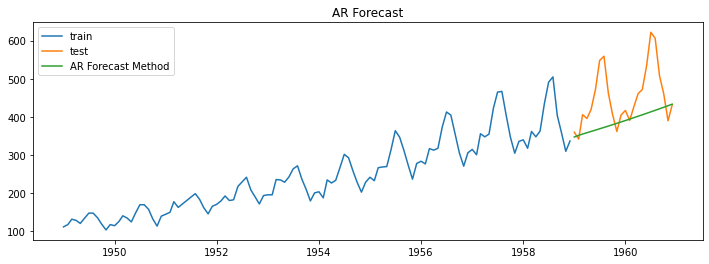

In [148]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label= "train")
plt.plot(test["Passengers"], label= "test")
plt.plot(y_hat_ar["ar_forecast"][test.index.min():], label= "AR Forecast Method")
plt.legend(loc="best")
plt.title("AR Forecast")
plt.show()

In [149]:
rmse= np.sqrt(mean_squared_error(test["Passengers"], y_hat_ar["ar_forecast"][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"]-y_hat_ar["ar_forecast"][test.index.min():])/test["Passengers"])*100,2)
Ar_results=pd.DataFrame({"METHOD": "AR", "RMSE":[rmse], "MAPE": [mape]})
results= pd.concat([results, Ar_results])
results = results[['METHOD', 'RMSE', 'MAPE']]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45
0,AR,93.39,13.77


### Moving Average Method

In [150]:
model= ARIMA(train_data_boxcox_dif, order=(0,0,1))
model_fit= model.fit()
print(model_fit.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


### Recovering original time series

In [151]:
y_hat_ma= df_boxcox_dif.copy()
y_hat_ma["ma_forecast_boxcox_dif"]= model_fit.predict(df_boxcox_dif.index.min(), df_boxcox_dif.index.max())
y_hat_ma["ma_forecast_boxcox"]= y_hat_ma["ma_forecast_boxcox_dif"].cumsum()
y_hat_ma["ma_forecast_boxcox"]= y_hat_ma["ma_forecast_boxcox"].add(df_boxcox[0])
y_hat_ma["ma_forecast"]= np.exp(y_hat_ma["ma_forecast_boxcox"])

### Plotting Forecast

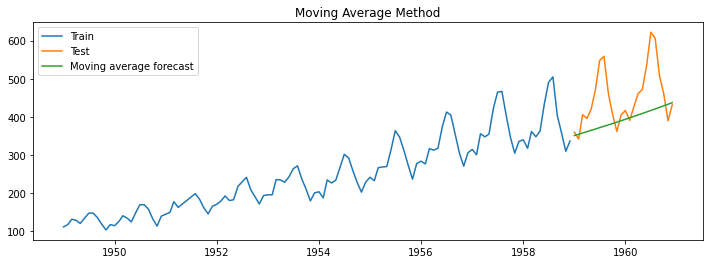

In [152]:
plt.figure(figsize=(12,4))
plt.plot(df['Passengers'][:train_len], label='Train')
plt.plot(df['Passengers'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### MAPE, RMSE Calculation

In [153]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'METHOD':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['METHOD', 'RMSE', 'MAPE']]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45
0,AR,93.39,13.77
0,Moving Average (MA) method,91.21,13.39


### Auto regression moving average method (ARMA)

In [154]:
model= ARIMA(train_data_boxcox_dif, order=(1,0,1))
model_fit= model.fit()
model_fit.params

const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64

### Recovering original time series 

In [155]:
y_hat_arma= df_boxcox_dif.copy()
y_hat_arma["arma_forcast_boxcox_dif"]= model_fit.predict(df_boxcox_dif.index.min(),df_boxcox_dif.index.max())
y_hat_arma["arma_forecast_boxcox"]= y_hat_arma["arma_forcast_boxcox_dif"].cumsum()
y_hat_arma["arma_forecast_boxcox"]= y_hat_arma["arma_forecast_boxcox"].add(df_boxcox[0])
y_hat_arma["arma_forecast"]= np.exp(y_hat_arma["arma_forecast_boxcox"])
y_hat_arma["arma_forecast"]

1949-02-01    113.083060
1949-03-01    115.139891
1949-04-01    118.235712
1949-05-01    116.899616
1949-06-01    117.756746
                 ...    
1960-08-01    425.073394
1960-09-01    429.184002
1960-10-01    433.334252
1960-11-01    437.524693
1960-12-01    441.755625
Freq: MS, Length: 143, dtype: float64

### Plotting the Forecast

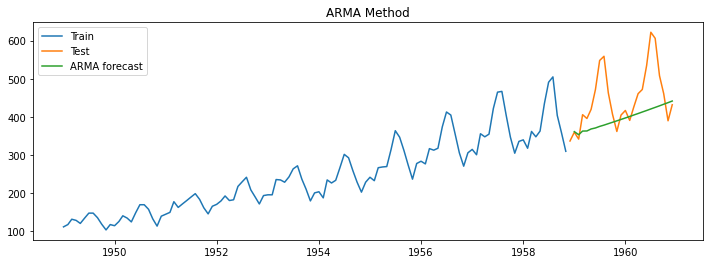

In [156]:
plt.figure(figsize=(12,4))
plt.plot( df['Passengers'][:train_len-1], label='Train')
plt.plot(df['Passengers'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [157]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][train_len-1:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'METHOD':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['METHOD', 'RMSE', 'MAPE']]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45
0,AR,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


### Auto regressive integrated moving average (ARIMA)

In [158]:
model= ARIMA(train_data_boxcox, order=(1,1,1))
model_fit= model.fit()
model_fit.params

const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64

### Recover Original Time Series

In [159]:
y_hat_arima= df_boxcox_dif.copy()
y_hat_arima["arima_forecast_boxcox_dif"]= model_fit.predict(df_boxcox_dif.index.min(), df_boxcox_dif.index.max())
y_hat_arima["arima_forecast_boxcox"]= y_hat_arima["arima_forecast_boxcox_dif"].cumsum()
y_hat_arima["arima_forecast_boxcox"]= y_hat_arima["arima_forecast_boxcox"].add(df_boxcox[0])
y_hat_arima["arima_forecast"]= np.exp(y_hat_arima["arima_forecast_boxcox"])

### Plot Forecast

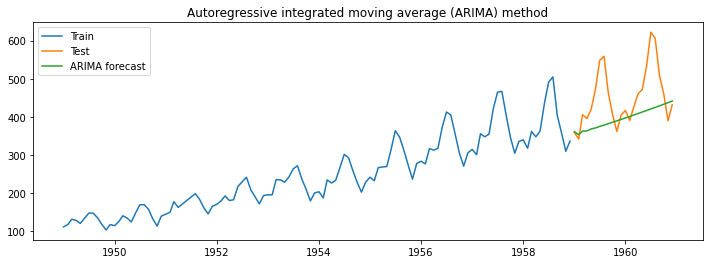

In [160]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### MAPE & RMSE Calculation

In [161]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'METHOD':['ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['METHOD', 'RMSE', 'MAPE']]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45
0,AR,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


### SARIMA

In [162]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
model_fit.params

ar.L1       0.388354
ma.L1      -0.679256
ar.S.L12   -0.042166
ma.S.L12   -0.515521
sigma2      0.001408
dtype: float64

### Recovering Time Series Data

In [163]:
y_hat_sarima= df_boxcox_dif.copy()
y_hat_sarima["sarima_forecast_boxcox"]= model_fit.predict(df_boxcox_dif.index.min(), df_boxcox_dif.index.max())
y_hat_sarima["Sarima_forecast"]= np.exp(y_hat_sarima["sarima_forecast_boxcox"])

### Plotting Forecast

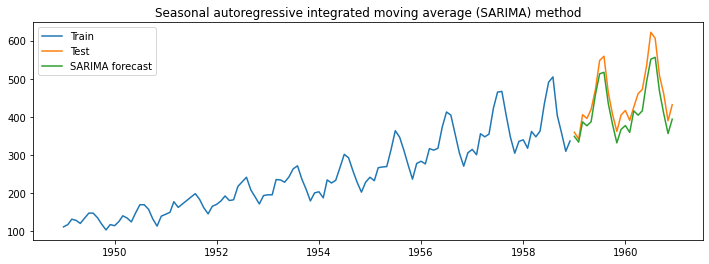

In [164]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['Sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### RMSE & MAPE Calculation

In [165]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['Sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['Sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'METHOD':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['METHOD', 'RMSE', 'MAPE']]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45
0,AR,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


### SARIMAX

In [166]:
promo= pd.read_csv("/content/promotion.csv", header=None)
promo.columns=["Month", "Event"]
promo["Month"]= pd.to_datetime(promo["Month"], format="%Y-%m")
promo=promo.set_index("Month")
promo.head()

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0


### Train Test Split

In [167]:
promo_train= promo[:train_len]
promo_test= promo[train_len:]

### SARIMAX Model

In [168]:
model= SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12), exog= promo_train)
model_fit= model.fit()
model_fit.params

Event       0.034336
ar.L1       0.477268
ma.L1      -0.740373
ar.S.L12   -0.064433
ma.S.L12   -0.557363
sigma2      0.001334
dtype: float64

Recovering Original time series forecast

In [169]:
y_hat_sarimax= df_boxcox_dif.copy()
y_hat_sarimax["sarimax_forecast_boxcox"]= model_fit.predict(df_boxcox_dif.index.min(), df_boxcox_dif.index.max(), exog= promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

Plotting Forecast

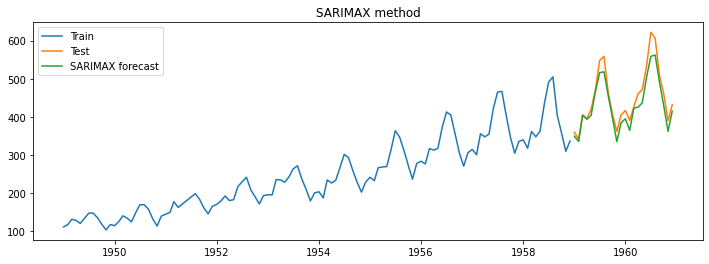

In [170]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

### Calculate RMSE and MAPE

In [171]:
rmse= np.sqrt(mean_squared_error(test["Passengers"], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test["Passengers"]- y_hat_sarimax['sarimax_forecast'][test.index.min():])/test["Passengers"])*100,2)
temp_results= pd.DataFrame({"METHOD":["SARIMAX"], "RMSE":[rmse], "MAPE":[mape]})
results= pd.concat([results, temp_results])
results=results[["METHOD", "RMSE", "MAPE"]]
results

,METHOD,RMSE,MAPE
0,NAIVE_METHOD,137.51,23.63
0,SA,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,SES,107.65,16.49
0,HoltsTrend,71.94,11.11
0,Holt'/s winter additive method,35.87,6.72
0,hwm,32.46,6.45
0,AR,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89
